In [16]:
# Importation des librairies de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import argparse

In [17]:
import warnings
warnings.filterwarnings('ignore')

### Question 1

In [18]:
df_bitcoin = pd.read_csv('coin_Bitcoin.csv')
print(f"Dimensions du dataset: {df_bitcoin.shape}")

df_bitcoin

Dimensions du dataset: (2862, 10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59,54204.929760,45290.590270,54204.929760,48824.426870,1.061020e+11,9.099260e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59,51290.136690,47213.498160,48835.087660,49705.333320,6.369552e+10,9.263930e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59,51948.966980,47093.853020,49709.082420,47093.853020,5.450657e+10,8.777660e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59,48370.785260,44454.842110,47180.464050,46339.760080,3.509680e+11,8.637520e+11


In [19]:
# Rechargement des données pour s'assurer qu'on part de 2862 observations
df_bitcoin = pd.read_csv('coin_Bitcoin.csv')
print(f"Nombre d'observations initiales: {df_bitcoin.shape[0]}")

# Calcul des rendements quotidiens
df_bitcoin['Returns'] = df_bitcoin['Close'].pct_change()

print(f"Nombre de valeurs manquantes après calcul des rendements: {df_bitcoin['Returns'].isna().sum()}")

# Suppression des observations manquantes
df_bitcoin = df_bitcoin.dropna(subset=['Returns']).reset_index(drop=True)

print(f"\nNombre d'observations après nettoyage: {df_bitcoin.shape[0]}")
print(f"Nombre de valeurs manquantes après nettoyage: {df_bitcoin['Returns'].isna().sum()}")
print(f"\nDimensions finales: {df_bitcoin.shape}")

Nombre d'observations initiales: 2862
Nombre de valeurs manquantes après calcul des rendements: 1

Nombre d'observations après nettoyage: 2861
Nombre de valeurs manquantes après nettoyage: 0

Dimensions finales: (2861, 11)


In [20]:
df_bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Returns
0,2,Bitcoin,BTC,2013-04-30 23:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,-0.038328
1,3,Bitcoin,BTC,2013-05-01 23:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,-0.158345
2,4,Bitcoin,BTC,2013-05-02 23:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,-0.100692
3,5,Bitcoin,BTC,2013-05-03 23:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,-0.070906
4,6,Bitcoin,BTC,2013-05-04 23:59,115.000000,92.500000,98.099998,112.500000,0.000000e+00,1.250317e+09,0.150895
...,...,...,...,...,...,...,...,...,...,...,...
2856,2858,Bitcoin,BTC,2021-02-23 23:59,54204.929760,45290.590270,54204.929760,48824.426870,1.061020e+11,9.099260e+11,-0.099302
2857,2859,Bitcoin,BTC,2021-02-24 23:59,51290.136690,47213.498160,48835.087660,49705.333320,6.369552e+10,9.263930e+11,0.018042
2858,2860,Bitcoin,BTC,2021-02-25 23:59,51948.966980,47093.853020,49709.082420,47093.853020,5.450657e+10,8.777660e+11,-0.052539
2859,2861,Bitcoin,BTC,2021-02-26 23:59,48370.785260,44454.842110,47180.464050,46339.760080,3.509680e+11,8.637520e+11,-0.016013


In [23]:
# Statistiques descriptives des rendements
print("=== Statistiques descriptives des rendements quotidiens ===\n")
print(df_bitcoin['Returns'].describe())

=== Statistiques descriptives des rendements quotidiens ===

count    2861.000000
mean        0.002922
std         0.042496
min        -0.371695
25%        -0.012405
50%         0.001919
75%         0.018529
max         0.429680
Name: Returns, dtype: float64


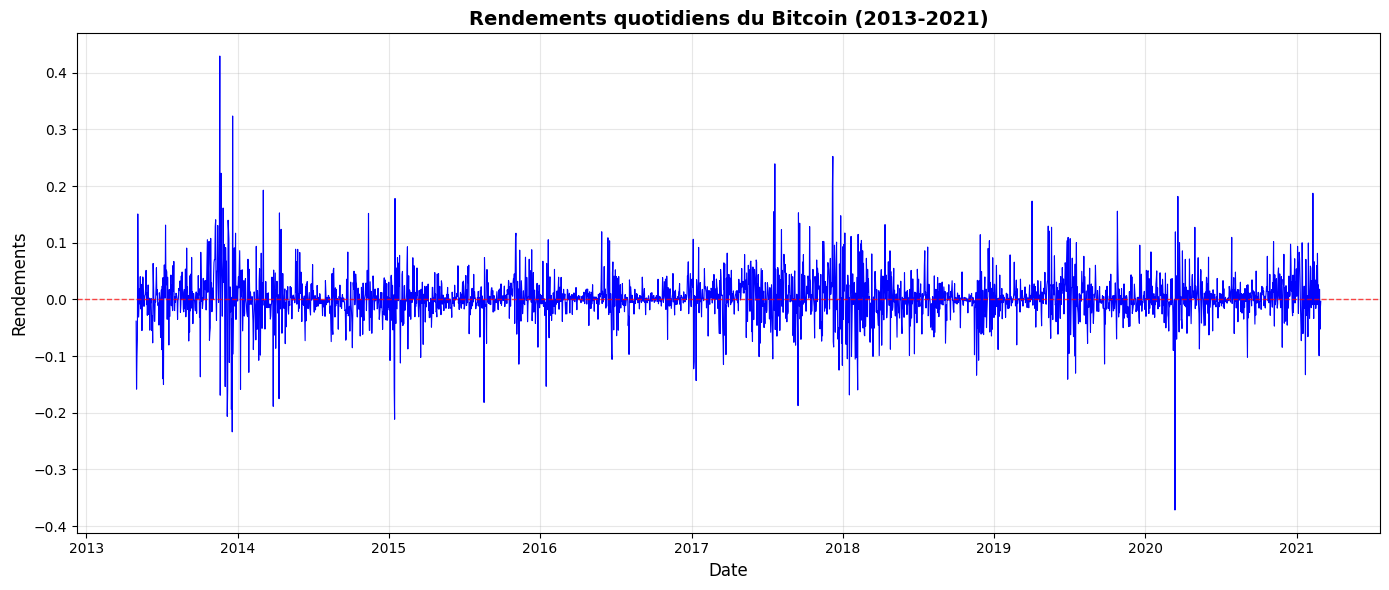

In [29]:
# Graphique de série temporelle des rendements quotidiens
# Conversion de la colonne Date en datetime
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

plt.figure(figsize=(14, 6))
plt.plot(df_bitcoin['Date'], df_bitcoin['Returns'], linewidth=0.8, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.title('Rendements quotidiens du Bitcoin (2013-2021)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rendements', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Discussion des résultats

#### Analyse des statistiques descriptives

Les rendements quotidiens du Bitcoin présentent plusieurs caractéristiques importantes :

**1. Rendement moyen et tendance centrale**
- Le rendement moyen de **0,29%** par jour est relativement élevé, ce qui suggère une tendance haussière sur la période analysée (2013-2021)
- La médiane (0,19%) est légèrement inférieure à la moyenne, indiquant une distribution asymétrique

**2. Volatilité**
- L'écart-type de **4,25%** révèle une volatilité très élevée, typique des crypto-monnaies
- Cette volatilité est significativement plus importante que celle des actifs financiers traditionnels (actions, obligations)
- Les rendements varient de **-37,17%** à **+42,97%**, confirmant l'existence de mouvements de prix extrêmes

**3. Distribution des rendements**
- Le **Skewness positif (0,26)** indique une légère asymétrie vers la droite, suggérant plus de rendements positifs extrêmes que négatifs
- Le **Kurtosis élevé (10,82)** révèle des queues de distribution épaisses (leptokurtique), confirmant la présence de valeurs extrêmes fréquentes
- Cette distribution non-normale implique des risques importants de pertes (et de gains) soudaines

**4. Analyse du graphique temporel**

Le graphique de série temporelle révèle :
- Des **clusters de volatilité** : les périodes de forte volatilité tendent à persister (effet GARCH)
- Plusieurs épisodes de **chocs extrêmes** visibles notamment en 2013-2014, 2017-2018, et 2020
- Une volatilité qui ne semble pas diminuer avec le temps, suggérant que le Bitcoin reste un actif très risqué

**Conclusion**

Le Bitcoin se caractérise par des rendements moyens élevés mais accompagnés d'une volatilité extrême et de risques de pertes importantes. Ces caractéristiques en font un actif spéculatif qui ne convient pas aux investisseurs averses au risque.